In [1]:
import pandas as pd
import utils
import matplotlib.pyplot as plt
import random
import plotly.express as px
import seaborn as sns

random.seed(9000)

plt.style.use("seaborn-ticks")
plt.rcParams["image.cmap"] = "Set1"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
%matplotlib inline

In [2]:
n_samples = 1000
n_replicates = 4  #number of sample replicates within each plate 
metadata_common = 'Metadata_moa'
metadata_perturbation = 'Metadata_broad_sample'
group_by_feature = 'Metadata_broad_sample'
#batch = "Scope1_MolDev_10X"

experiment_df = (
    pd.read_csv('output/experiment-metadata.tsv', sep='\t')
#    .query('Batch==@batch')
)
experiment_df.tail(50)

Vendor                                   Batch  \
6           MolDev              Scope1_MolDev_20X_Adaptive   
7            Nikon                        Scope1_Nikon_10X   
8            Nikon                        Scope1_Nikon_10X   
9            Nikon                        Scope1_Nikon_10X   
10           Nikon                        Scope1_Nikon_10X   
11           Nikon                        Scope1_Nikon_20X   
12           Nikon                        Scope1_Nikon_20X   
13           Nikon                        Scope1_Nikon_20X   
14              PE          Scope1_PE_Bin1_Confocal_1Plane   
15              PE          Scope1_PE_Bin1_Confocal_1Plane   
16              PE          Scope1_PE_Bin1_Confocal_1Plane   
17              PE          Scope1_PE_Bin1_Confocal_1Plane   
18              PE          Scope1_PE_Bin1_Confocal_3Plane   
19              PE          Scope1_PE_Bin1_Confocal_3Plane   
20              PE          Scope1_PE_Bin1_Confocal_3Plane   
21              PE          Scope1_PE_Bin1_Confocal_3Plane   
22              PE         Scope1_PE_Bin1_Widefield_1Plane   
23              PE         Scope1_PE_Bin1_Widefield_1Plane   
24              PE         Scope1_PE_Bin1_Widefield_1Plane   
25              PE         Scope1_PE_Bin1_Widefield_1Plane   
26              PE         Scope1_PE_Bin1_Widefield_3Plane   
27              PE         Scope1_PE_Bin1_Widefield_3Plane   
28              PE         Scope1_PE_Bin1_Widefield_3Plane   
29              PE         Scope1_PE_Bin1_Widefield_3Plane   
30              PE          Scope1_PE_Bin2_Confocal_1Plane   
31              PE          Scope1_PE_Bin2_Confocal_1Plane   
32              PE          Scope1_PE_Bin2_Confocal_1Plane   
33              PE          Scope1_PE_Bin2_Confocal_1Plane   
34              PE          Scope1_PE_Bin2_Confocal_3Plane   
35              PE          Scope1_PE_Bin2_Confocal_3Plane   
36              PE          Scope1_PE_Bin2_Confocal_3Plane   
37              PE          Scope1_PE_Bin2_Confocal_3Plane   
38              PE         Scope1_PE_Bin2_Widefield_1Plane   
39              PE         Scope1_PE_Bin2_Widefield_1Plane   
40              PE         Scope1_PE_Bin2_Widefield_1Plane   
41              PE         Scope1_PE_Bin2_Widefield_1Plane   
42              PE         Scope1_PE_Bin2_Widefield_3Plane   
43              PE         Scope1_PE_Bin2_Widefield_3Plane   
44              PE         Scope1_PE_Bin2_Widefield_3Plane   
45              PE         Scope1_PE_Bin2_Widefield_3Plane   
46  Yokogawa_Japan               Scope1_Yokogawa_Japan_20X   
47  Yokogawa_Japan               Scope1_Yokogawa_Japan_40X   
48     Yokogawa_US                  Scope1_Yokogawa_US_10X   
49     Yokogawa_US              Scope1_Yokogawa_US_20X_5Ch   
50     Yokogawa_US              Scope1_Yokogawa_US_20X_5Ch   
51     Yokogawa_US              Scope1_Yokogawa_US_20X_5Ch   
52     Yokogawa_US   Scope1_Yokogawa_US_20X_6Ch_BRO0117033   
53     Yokogawa_US   Scope1_Yokogawa_US_20X_6Ch_BRO0117059   
54     Yokogawa_US  Scope1_Yokogawa_US_20X_6Ch_BRO01177034   
55     Yokogawa_US       Scope1_Yokogawa_US_40X_BRO0117059   

                Plate_Map_Name                Assay_Plate_Barcode   Modality  \
6   JUMP-MOA_compound_platemap      Plate3_PCO_6ch_Adaptive_20XPA   Confocal   
7   JUMP-MOA_compound_platemap                     BR00117060a10x  Widefield   
8   JUMP-MOA_compound_platemap                     BR00117061a10x  Widefield   
9   JUMP-MOA_compound_platemap                     BR00117062a10x  Widefield   
10  JUMP-MOA_compound_platemap                     BR00117063b10x  Widefield   
11  JUMP-MOA_compound_platemap                        BR00117061a  Widefield   
12  JUMP-MOA_compound_platemap                        BR00117062a  Widefield   
13  JUMP-MOA_compound_platemap                        BR00117063b  Widefield   
14  JUMP-MOA_compound_platemap   CP_Broad_Phenix_C_BIN1_1Plane_P1   Confocal   
15  JUMP-MOA_compound_platemap   CP_Broad_Phenix_

In [3]:
corr_replicating_df = pd.DataFrame()
corr_matching_df = pd.DataFrame()

for a_vendor in experiment_df["Vendor"].unique():
    vendor_data = experiment_df.loc[experiment_df["Vendor"] == a_vendor]
#    print([a_vendor, len(vendor_data)])
    for a_batch in vendor_data["Batch"].unique():
        batch_data = vendor_data.loc[vendor_data["Batch"] == a_batch]
#        print([a_batch, len(batch_data)])
        for a_plate in batch_data["Assay_Plate_Barcode"].unique():
            plate_data = batch_data.loc[batch_data["Assay_Plate_Barcode"] == a_plate]
#            print([a_plate, len(plate_data)])
            plate_df = utils.load_data(a_batch, a_plate, "normalized_feature_select_negcon_batch.csv.gz")
            plate_df = utils.remove_negcon_empty_wells(plate_df)
                
            replicating_corr = list(utils.corr_between_replicates(plate_df, group_by_feature))
            null_replicating = list(utils.corr_between_non_replicates(plate_df, n_samples=n_samples, n_replicates=n_replicates, metadata_compound_name = group_by_feature))

            prop_95_replicating, value_95_replicating = utils.percent_score(null_replicating, replicating_corr, how='right')
            
            corr_replicating_df = corr_replicating_df.append({'Scope_vendor': a_vendor,
                                                              'Batch': a_batch,
                                                              'Plate_Name': a_plate,
                                                              'Replicating':replicating_corr,
                                                              'Null_Replicating':null_replicating,
                                                              'Percent_Replicating':'%.1f'%prop_95_replicating,
                                                              'Value_95':value_95_replicating}, ignore_index=True)
            
            matching_corr = list(utils.corr_between_perturbation_pairs(plate_df, 'Metadata_moa', 'Metadata_broad_sample'))
            null_matching = list(utils.corr_between_perturbation_non_pairs(plate_df, n_samples=n_samples, metadata_common=metadata_common, metadata_perturbation=metadata_perturbation))

            prop_95_matching, value_95_matching = utils.percent_score(null_matching, matching_corr, how='right')

            corr_matching_df = corr_matching_df.append({'Scope_vendor': a_vendor,
                                                        'Batch': a_batch,
                                                        'Plate_Name': a_plate,
                                                        'Matching':matching_corr,
                                                        'Null_Matching':null_matching,
                                                        'Percent_Matching':'%.3f'%prop_95_matching,
                                                        'Value_95':value_95_matching}, ignore_index=True)

/Users/njamali/miniconda3/envs/jump-scope-analysis/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/njamali/miniconda3/envs/jump-scope-analysis/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [4]:
columns = ['Scope_vendor', 'Batch', 'Plate_Name']
corr_replicating_df['Percent_Replicating'] = corr_replicating_df['Percent_Replicating'].astype(float)
print(corr_replicating_df[columns+['Percent_Replicating']].to_markdown(index=False))

| Scope_vendor   | Batch                                  | Plate_Name                        |   Percent_Replicating |
|:---------------|:---------------------------------------|:----------------------------------|----------------------:|
| MolDev         | Scope1_MolDev_10X                      | Plate2_PCO_6ch_4site_10XPA        |                  33.3 |
| MolDev         | Scope1_MolDev_10X                      | Plate3_PCO_6ch_4site_10XPA_Crest  |                  50   |
| MolDev         | Scope1_MolDev_10X                      | Plate3_PCO_6ch_4site_10XPA_Crestz |                  51.1 |
| MolDev         | Scope1_MolDev_20X_4site                | Plate3_PCO_6ch_4site_20XPA_Crestz |                  43.3 |
| MolDev         | Scope1_MolDev_20X_9site                | Plate2_PCO_6ch_9site_20XPA        |                  56.7 |
| MolDev         | Scope1_MolDev_20X_9site                | Plate3_PCO_6ch_9site_20XPA_Crest  |                  50   |
| MolDev         | Scope1_MolDev_20X_Ada

In [5]:
corr_replicating_df[columns+['Percent_Replicating']]

Scope_vendor                                   Batch  \
0           MolDev                       Scope1_MolDev_10X   
1           MolDev                       Scope1_MolDev_10X   
2           MolDev                       Scope1_MolDev_10X   
3           MolDev                 Scope1_MolDev_20X_4site   
4           MolDev                 Scope1_MolDev_20X_9site   
5           MolDev                 Scope1_MolDev_20X_9site   
6           MolDev              Scope1_MolDev_20X_Adaptive   
7            Nikon                        Scope1_Nikon_10X   
8            Nikon                        Scope1_Nikon_10X   
9            Nikon                        Scope1_Nikon_10X   
10           Nikon                        Scope1_Nikon_10X   
11           Nikon                        Scope1_Nikon_20X   
12           Nikon                        Scope1_Nikon_20X   
13           Nikon                        Scope1_Nikon_20X   
14              PE          Scope1_PE_Bin1_Confocal_1Plane   
15              PE          Scope1_PE_Bin1_Confocal_1Plane   
16              PE          Scope1_PE_Bin1_Confocal_1Plane   
17              PE          Scope1_PE_Bin1_Confocal_1Plane   
18              PE          Scope1_PE_Bin1_Confocal_3Plane   
19              PE          Scope1_PE_Bin1_Confocal_3Plane   
20              PE          Scope1_PE_Bin1_Confocal_3Plane   
21              PE          Scope1_PE_Bin1_Confocal_3Plane   
22              PE         Scope1_PE_Bin1_Widefield_1Plane   
23              PE         Scope1_PE_Bin1_Widefield_1Plane   
24              PE         Scope1_PE_Bin1_Widefield_1Plane   
25              PE         Scope1_PE_Bin1_Widefield_1Plane   
26              PE         Scope1_PE_Bin1_Widefield_3Plane   
27              PE         Scope1_PE_Bin1_Widefield_3Plane   
28              PE         Scope1_PE_Bin1_Widefield_3Plane   
29              PE         Scope1_PE_Bin1_Widefield_3Plane   
30              PE          Scope1_PE_Bin2_Confocal_1Plane   
31              PE          Scope1_PE_Bin2_Confocal_1Plane   
32              PE          Scope1_PE_Bin2_Confocal_1Plane   
33              PE          Scope1_PE_Bin2_Confocal_1Plane   
34              PE          Scope1_PE_Bin2_Confocal_3Plane   
35              PE          Scope1_PE_Bin2_Confocal_3Plane   
36              PE          Scope1_PE_Bin2_Confocal_3Plane   
37              PE          Scope1_PE_Bin2_Confocal_3Plane   
38              PE         Scope1_PE_Bin2_Widefield_1Plane   
39              PE         Scope1_PE_Bin2_Widefield_1Plane   
40              PE         Scope1_PE_Bin2_Widefield_1Plane   
41              PE         Scope1_PE_Bin2_Widefield_1Plane   
42              PE         Scope1_PE_Bin2_Widefield_3Plane   
43              PE         Scope1_PE_Bin2_Widefield_3Plane   
44              PE         Scope1_PE_Bin2_Widefield_3Plane   
45              PE         Scope1_PE_Bin2_Widefield_3Plane   
46  Yokogawa_Japan               Scope1_Yokogawa_Japan_20X   
47  Yokogawa_Japan               Scope1_Yokogawa_Japan_40X   
48     Yokogawa_US                  Scope1_Yokogawa_US_10X   
49     Yokogawa_US              Scope1_Yokogawa_US_20X_5Ch   
50     Yokogawa_US              Scope1_Yokogawa_US_20X_5Ch   
51     Yokogawa_US              Scope1_Yokogawa_US_20X_5Ch   
52     Yokogawa_US   Scope1_Yokogawa_US_20X_6Ch_BRO0117033   
53     Yokogawa_US   Scope1_Yokogawa_US_20X_6Ch_BRO0117059   
54     Yokogawa_US  Scope1_Yokogawa_US_20X_6Ch_BRO01177034   
55     Yokogawa_US       Scope1_Yokogawa_US_40X_BRO0117059   

                           Plate_Name  Percent_Replicating  
0          Plate2_PCO_6ch_4site_10XPA                 33.3  
1    Plate3_PCO_6ch_4site_10XPA_Crest                 50.0  
2   Plate3_PCO_6ch_4site_10XPA_Crestz                 51.1  
3   Plate3_PCO_6ch_4site_20XPA_Crestz                 43.3  
4          Plate2_PCO_6ch_9site_20XPA                 56.7  
5    Plate3_PCO_6ch_9site_20XPA_Crest                 50.0  
6       Plate3_PCO_6ch_Adaptive_20XPA       

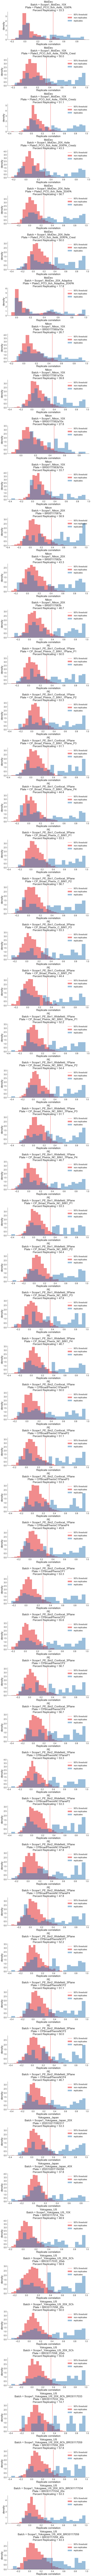

In [6]:
#utils.distribution_plot(df=corr_replicating_df, output_file="1.percent_replicating.png", metric="Percent Replicating")
n_experiments = len(corr_replicating_df)

plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(corr_replicating_df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(corr_replicating_df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(corr_replicating_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{corr_replicating_df.loc[i,'Scope_vendor']}\n" +
        f"Batch = {corr_replicating_df.loc[i, 'Batch']}\n" +
        f"Plate = {corr_replicating_df.loc[i, 'Plate_Name']}\n" +
        f"Percent Replicating = {corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Replicate correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()
#plt.savefig('figures/0.percent_replicating.png')


In [7]:
corr_matching_df['Percent_Matching'] = corr_matching_df['Percent_Matching'].astype(float)
print(corr_matching_df[columns+['Percent_Matching']].to_markdown(index=False))

| Scope_vendor   | Batch                                  | Plate_Name                        |   Percent_Matching |
|:---------------|:---------------------------------------|:----------------------------------|-------------------:|
| MolDev         | Scope1_MolDev_10X                      | Plate2_PCO_6ch_4site_10XPA        |             20.93  |
| MolDev         | Scope1_MolDev_10X                      | Plate3_PCO_6ch_4site_10XPA_Crest  |             16.279 |
| MolDev         | Scope1_MolDev_10X                      | Plate3_PCO_6ch_4site_10XPA_Crestz |             16.279 |
| MolDev         | Scope1_MolDev_20X_4site                | Plate3_PCO_6ch_4site_20XPA_Crestz |             16.279 |
| MolDev         | Scope1_MolDev_20X_9site                | Plate2_PCO_6ch_9site_20XPA        |             18.605 |
| MolDev         | Scope1_MolDev_20X_9site                | Plate3_PCO_6ch_9site_20XPA_Crest  |             13.953 |
| MolDev         | Scope1_MolDev_20X_Adaptive             | Plat

In [8]:
corr_matching_df[columns+['Percent_Matching']]

Scope_vendor                                   Batch  \
0           MolDev                       Scope1_MolDev_10X   
1           MolDev                       Scope1_MolDev_10X   
2           MolDev                       Scope1_MolDev_10X   
3           MolDev                 Scope1_MolDev_20X_4site   
4           MolDev                 Scope1_MolDev_20X_9site   
5           MolDev                 Scope1_MolDev_20X_9site   
6           MolDev              Scope1_MolDev_20X_Adaptive   
7            Nikon                        Scope1_Nikon_10X   
8            Nikon                        Scope1_Nikon_10X   
9            Nikon                        Scope1_Nikon_10X   
10           Nikon                        Scope1_Nikon_10X   
11           Nikon                        Scope1_Nikon_20X   
12           Nikon                        Scope1_Nikon_20X   
13           Nikon                        Scope1_Nikon_20X   
14              PE          Scope1_PE_Bin1_Confocal_1Plane   
15              PE          Scope1_PE_Bin1_Confocal_1Plane   
16              PE          Scope1_PE_Bin1_Confocal_1Plane   
17              PE          Scope1_PE_Bin1_Confocal_1Plane   
18              PE          Scope1_PE_Bin1_Confocal_3Plane   
19              PE          Scope1_PE_Bin1_Confocal_3Plane   
20              PE          Scope1_PE_Bin1_Confocal_3Plane   
21              PE          Scope1_PE_Bin1_Confocal_3Plane   
22              PE         Scope1_PE_Bin1_Widefield_1Plane   
23              PE         Scope1_PE_Bin1_Widefield_1Plane   
24              PE         Scope1_PE_Bin1_Widefield_1Plane   
25              PE         Scope1_PE_Bin1_Widefield_1Plane   
26              PE         Scope1_PE_Bin1_Widefield_3Plane   
27              PE         Scope1_PE_Bin1_Widefield_3Plane   
28              PE         Scope1_PE_Bin1_Widefield_3Plane   
29              PE         Scope1_PE_Bin1_Widefield_3Plane   
30              PE          Scope1_PE_Bin2_Confocal_1Plane   
31              PE          Scope1_PE_Bin2_Confocal_1Plane   
32              PE          Scope1_PE_Bin2_Confocal_1Plane   
33              PE          Scope1_PE_Bin2_Confocal_1Plane   
34              PE          Scope1_PE_Bin2_Confocal_3Plane   
35              PE          Scope1_PE_Bin2_Confocal_3Plane   
36              PE          Scope1_PE_Bin2_Confocal_3Plane   
37              PE          Scope1_PE_Bin2_Confocal_3Plane   
38              PE         Scope1_PE_Bin2_Widefield_1Plane   
39              PE         Scope1_PE_Bin2_Widefield_1Plane   
40              PE         Scope1_PE_Bin2_Widefield_1Plane   
41              PE         Scope1_PE_Bin2_Widefield_1Plane   
42              PE         Scope1_PE_Bin2_Widefield_3Plane   
43              PE         Scope1_PE_Bin2_Widefield_3Plane   
44              PE         Scope1_PE_Bin2_Widefield_3Plane   
45              PE         Scope1_PE_Bin2_Widefield_3Plane   
46  Yokogawa_Japan               Scope1_Yokogawa_Japan_20X   
47  Yokogawa_Japan               Scope1_Yokogawa_Japan_40X   
48     Yokogawa_US                  Scope1_Yokogawa_US_10X   
49     Yokogawa_US              Scope1_Yokogawa_US_20X_5Ch   
50     Yokogawa_US              Scope1_Yokogawa_US_20X_5Ch   
51     Yokogawa_US              Scope1_Yokogawa_US_20X_5Ch   
52     Yokogawa_US   Scope1_Yokogawa_US_20X_6Ch_BRO0117033   
53     Yokogawa_US   Scope1_Yokogawa_US_20X_6Ch_BRO0117059   
54     Yokogawa_US  Scope1_Yokogawa_US_20X_6Ch_BRO01177034   
55     Yokogawa_US       Scope1_Yokogawa_US_40X_BRO0117059   

                           Plate_Name  Percent_Matching  
0          Plate2_PCO_6ch_4site_10XPA            20.930  
1    Plate3_PCO_6ch_4site_10XPA_Crest            16.279  
2   Plate3_PCO_6ch_4site_10XPA_Crestz            16.279  
3   Plate3_PCO_6ch_4site_20XPA_Crestz            16.279  
4          Plate2_PCO_6ch_9site_20XPA            18.605  
5    Plate3_PCO_6ch_9site_20XPA_Crest            13.953  
6       Plate3_PCO_6ch_Adaptive_20XPA             6.977  
7      

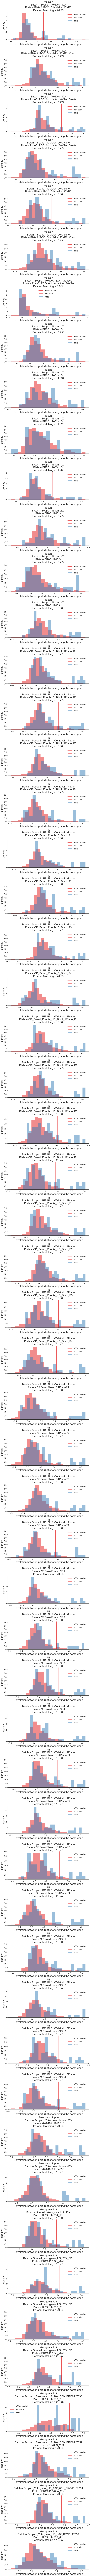

In [9]:
n_experiments = len(corr_matching_df)

plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(corr_matching_df.loc[i,'Null_Matching'], label='non-pairs', density=True, bins=20, alpha=0.5)
    plt.hist(corr_matching_df.loc[i,'Matching'], label='pairs', density=True, bins=20, alpha=0.5)
    plt.axvline(corr_matching_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{corr_matching_df.loc[i,'Scope_vendor']}\n" +
        f"Batch = {corr_matching_df.loc[i, 'Batch']}\n" +
        f"Plate = {corr_matching_df.loc[i, 'Plate_Name']}\n" +
        f"Percent Matching = {corr_matching_df.loc[i,'Percent_Matching']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Correlation between perturbations targeting the same gene", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()
#plt.savefig('figures/0.percent_matching.png')


In [10]:
merged_df = (
    corr_replicating_df[columns+['Percent_Replicating']]
        .merge(corr_matching_df[columns+['Percent_Matching']],
               on=columns,
               how='inner')
)

In [11]:
merged_df.head(50)

Scope_vendor                            Batch  \
0           MolDev                Scope1_MolDev_10X   
1           MolDev                Scope1_MolDev_10X   
2           MolDev                Scope1_MolDev_10X   
3           MolDev          Scope1_MolDev_20X_4site   
4           MolDev          Scope1_MolDev_20X_9site   
5           MolDev          Scope1_MolDev_20X_9site   
6           MolDev       Scope1_MolDev_20X_Adaptive   
7            Nikon                 Scope1_Nikon_10X   
8            Nikon                 Scope1_Nikon_10X   
9            Nikon                 Scope1_Nikon_10X   
10           Nikon                 Scope1_Nikon_10X   
11           Nikon                 Scope1_Nikon_20X   
12           Nikon                 Scope1_Nikon_20X   
13           Nikon                 Scope1_Nikon_20X   
14              PE   Scope1_PE_Bin1_Confocal_1Plane   
15              PE   Scope1_PE_Bin1_Confocal_1Plane   
16              PE   Scope1_PE_Bin1_Confocal_1Plane   
17              PE   Scope1_PE_Bin1_Confocal_1Plane   
18              PE   Scope1_PE_Bin1_Confocal_3Plane   
19              PE   Scope1_PE_Bin1_Confocal_3Plane   
20              PE   Scope1_PE_Bin1_Confocal_3Plane   
21              PE   Scope1_PE_Bin1_Confocal_3Plane   
22              PE  Scope1_PE_Bin1_Widefield_1Plane   
23              PE  Scope1_PE_Bin1_Widefield_1Plane   
24              PE  Scope1_PE_Bin1_Widefield_1Plane   
25              PE  Scope1_PE_Bin1_Widefield_1Plane   
26              PE  Scope1_PE_Bin1_Widefield_3Plane   
27              PE  Scope1_PE_Bin1_Widefield_3Plane   
28              PE  Scope1_PE_Bin1_Widefield_3Plane   
29              PE  Scope1_PE_Bin1_Widefield_3Plane   
30              PE   Scope1_PE_Bin2_Confocal_1Plane   
31              PE   Scope1_PE_Bin2_Confocal_1Plane   
32              PE   Scope1_PE_Bin2_Confocal_1Plane   
33              PE   Scope1_PE_Bin2_Confocal_1Plane   
34              PE   Scope1_PE_Bin2_Confocal_3Plane   
35              PE   Scope1_PE_Bin2_Confocal_3Plane   
36              PE   Scope1_PE_Bin2_Confocal_3Plane   
37              PE   Scope1_PE_Bin2_Confocal_3Plane   
38              PE  Scope1_PE_Bin2_Widefield_1Plane   
39              PE  Scope1_PE_Bin2_Widefield_1Plane   
40              PE  Scope1_PE_Bin2_Widefield_1Plane   
41              PE  Scope1_PE_Bin2_Widefield_1Plane   
42              PE  Scope1_PE_Bin2_Widefield_3Plane   
43              PE  Scope1_PE_Bin2_Widefield_3Plane   
44              PE  Scope1_PE_Bin2_Widefield_3Plane   
45              PE  Scope1_PE_Bin2_Widefield_3Plane   
46  Yokogawa_Japan        Scope1_Yokogawa_Japan_20X   
47  Yokogawa_Japan        Scope1_Yokogawa_Japan_40X   
48     Yokogawa_US           Scope1_Yokogawa_US_10X   
49     Yokogawa_US       Scope1_Yokogawa_US_20X_5Ch   

                           Plate_Name  Percent_Replicating  Percent_Matching  
0          Plate2_PCO_6ch_4site_10XPA                 33.3            20.930  
1    Plate3_PCO_6ch_4site_10XPA_Crest                 50.0            16.279  
2   Plate3_PCO_6ch_4site_10XPA_Crestz                 51.1            16.279  
3   Plate3_PCO_6ch_4site_20XPA_Crestz                 43.3            16.279  
4          Plate2_PCO_6ch_9site_20XPA                 56.7            18.605  
5    Plate3_PCO_6ch_9site_20XPA_Crest                 50.0            13.953  
6       Plate3_PCO_6ch_Adaptive_20XPA                 17.8             6.977  
7                      BR00117060a10x                 26.7            13.953  
8                      BR00117061a10x                 39.8            14.634  
9                      BR00117062a10x                 27.8            11.628  
10                     BR00117063b10x                 33.7            11.905  
11                        BR00117061a                 58.9            16.279  
12                        BR00117062a                 43.3            16.279  
13                        BR00117063b                 46.7            18.605  
14   CP_Broad_P

In [12]:
all_merge_df = pd.merge(merged_df, experiment_df, left_on = ['Scope_vendor','Batch','Plate_Name'], right_on = ['Vendor','Batch','Assay_Plate_Barcode'])

In [13]:
all_merge_df.head(50)

Scope_vendor                            Batch  \
0           MolDev                Scope1_MolDev_10X   
1           MolDev                Scope1_MolDev_10X   
2           MolDev                Scope1_MolDev_10X   
3           MolDev          Scope1_MolDev_20X_4site   
4           MolDev          Scope1_MolDev_20X_9site   
5           MolDev          Scope1_MolDev_20X_9site   
6           MolDev       Scope1_MolDev_20X_Adaptive   
7            Nikon                 Scope1_Nikon_10X   
8            Nikon                 Scope1_Nikon_10X   
9            Nikon                 Scope1_Nikon_10X   
10           Nikon                 Scope1_Nikon_10X   
11           Nikon                 Scope1_Nikon_20X   
12           Nikon                 Scope1_Nikon_20X   
13           Nikon                 Scope1_Nikon_20X   
14              PE   Scope1_PE_Bin1_Confocal_1Plane   
15              PE   Scope1_PE_Bin1_Confocal_1Plane   
16              PE   Scope1_PE_Bin1_Confocal_1Plane   
17              PE   Scope1_PE_Bin1_Confocal_1Plane   
18              PE   Scope1_PE_Bin1_Confocal_3Plane   
19              PE   Scope1_PE_Bin1_Confocal_3Plane   
20              PE   Scope1_PE_Bin1_Confocal_3Plane   
21              PE   Scope1_PE_Bin1_Confocal_3Plane   
22              PE  Scope1_PE_Bin1_Widefield_1Plane   
23              PE  Scope1_PE_Bin1_Widefield_1Plane   
24              PE  Scope1_PE_Bin1_Widefield_1Plane   
25              PE  Scope1_PE_Bin1_Widefield_1Plane   
26              PE  Scope1_PE_Bin1_Widefield_3Plane   
27              PE  Scope1_PE_Bin1_Widefield_3Plane   
28              PE  Scope1_PE_Bin1_Widefield_3Plane   
29              PE  Scope1_PE_Bin1_Widefield_3Plane   
30              PE   Scope1_PE_Bin2_Confocal_1Plane   
31              PE   Scope1_PE_Bin2_Confocal_1Plane   
32              PE   Scope1_PE_Bin2_Confocal_1Plane   
33              PE   Scope1_PE_Bin2_Confocal_1Plane   
34              PE   Scope1_PE_Bin2_Confocal_3Plane   
35              PE   Scope1_PE_Bin2_Confocal_3Plane   
36              PE   Scope1_PE_Bin2_Confocal_3Plane   
37              PE   Scope1_PE_Bin2_Confocal_3Plane   
38              PE  Scope1_PE_Bin2_Widefield_1Plane   
39              PE  Scope1_PE_Bin2_Widefield_1Plane   
40              PE  Scope1_PE_Bin2_Widefield_1Plane   
41              PE  Scope1_PE_Bin2_Widefield_1Plane   
42              PE  Scope1_PE_Bin2_Widefield_3Plane   
43              PE  Scope1_PE_Bin2_Widefield_3Plane   
44              PE  Scope1_PE_Bin2_Widefield_3Plane   
45              PE  Scope1_PE_Bin2_Widefield_3Plane   
46  Yokogawa_Japan        Scope1_Yokogawa_Japan_20X   
47  Yokogawa_Japan        Scope1_Yokogawa_Japan_40X   
48     Yokogawa_US           Scope1_Yokogawa_US_10X   
49     Yokogawa_US       Scope1_Yokogawa_US_20X_5Ch   

                           Plate_Name  Percent_Replicating  Percent_Matching  \
0          Plate2_PCO_6ch_4site_10XPA                 33.3            20.930   
1    Plate3_PCO_6ch_4site_10XPA_Crest                 50.0            16.279   
2   Plate3_PCO_6ch_4site_10XPA_Crestz                 51.1            16.279   
3   Plate3_PCO_6ch_4site_20XPA_Crestz                 43.3            16.279   
4          Plate2_PCO_6ch_9site_20XPA                 56.7            18.605   
5    Plate3_PCO_6ch_9site_20XPA_Crest                 50.0            13.953   
6       Plate3_PCO_6ch_Adaptive_20XPA                 17.8             6.977   
7                      BR00117060a10x                 26.7            13.953   
8                      BR00117061a10x                 39.8            14.634   
9                      BR00117062a10x                 27.8            11.628   
10                     BR00117063b10x                 33.7            11.905   
11                        BR00117061a                 58.9            16.279   
12                        BR00117062a                 43.3            16.279   
13                        BR00117063b                 46.7            18.605   


In [14]:
all_merge_df = all_merge_df.drop(['Vendor','Assay_Plate_Barcode'], axis=1)

In [15]:
all_merge_df.head(50)

Scope_vendor                            Batch  \
0           MolDev                Scope1_MolDev_10X   
1           MolDev                Scope1_MolDev_10X   
2           MolDev                Scope1_MolDev_10X   
3           MolDev          Scope1_MolDev_20X_4site   
4           MolDev          Scope1_MolDev_20X_9site   
5           MolDev          Scope1_MolDev_20X_9site   
6           MolDev       Scope1_MolDev_20X_Adaptive   
7            Nikon                 Scope1_Nikon_10X   
8            Nikon                 Scope1_Nikon_10X   
9            Nikon                 Scope1_Nikon_10X   
10           Nikon                 Scope1_Nikon_10X   
11           Nikon                 Scope1_Nikon_20X   
12           Nikon                 Scope1_Nikon_20X   
13           Nikon                 Scope1_Nikon_20X   
14              PE   Scope1_PE_Bin1_Confocal_1Plane   
15              PE   Scope1_PE_Bin1_Confocal_1Plane   
16              PE   Scope1_PE_Bin1_Confocal_1Plane   
17              PE   Scope1_PE_Bin1_Confocal_1Plane   
18              PE   Scope1_PE_Bin1_Confocal_3Plane   
19              PE   Scope1_PE_Bin1_Confocal_3Plane   
20              PE   Scope1_PE_Bin1_Confocal_3Plane   
21              PE   Scope1_PE_Bin1_Confocal_3Plane   
22              PE  Scope1_PE_Bin1_Widefield_1Plane   
23              PE  Scope1_PE_Bin1_Widefield_1Plane   
24              PE  Scope1_PE_Bin1_Widefield_1Plane   
25              PE  Scope1_PE_Bin1_Widefield_1Plane   
26              PE  Scope1_PE_Bin1_Widefield_3Plane   
27              PE  Scope1_PE_Bin1_Widefield_3Plane   
28              PE  Scope1_PE_Bin1_Widefield_3Plane   
29              PE  Scope1_PE_Bin1_Widefield_3Plane   
30              PE   Scope1_PE_Bin2_Confocal_1Plane   
31              PE   Scope1_PE_Bin2_Confocal_1Plane   
32              PE   Scope1_PE_Bin2_Confocal_1Plane   
33              PE   Scope1_PE_Bin2_Confocal_1Plane   
34              PE   Scope1_PE_Bin2_Confocal_3Plane   
35              PE   Scope1_PE_Bin2_Confocal_3Plane   
36              PE   Scope1_PE_Bin2_Confocal_3Plane   
37              PE   Scope1_PE_Bin2_Confocal_3Plane   
38              PE  Scope1_PE_Bin2_Widefield_1Plane   
39              PE  Scope1_PE_Bin2_Widefield_1Plane   
40              PE  Scope1_PE_Bin2_Widefield_1Plane   
41              PE  Scope1_PE_Bin2_Widefield_1Plane   
42              PE  Scope1_PE_Bin2_Widefield_3Plane   
43              PE  Scope1_PE_Bin2_Widefield_3Plane   
44              PE  Scope1_PE_Bin2_Widefield_3Plane   
45              PE  Scope1_PE_Bin2_Widefield_3Plane   
46  Yokogawa_Japan        Scope1_Yokogawa_Japan_20X   
47  Yokogawa_Japan        Scope1_Yokogawa_Japan_40X   
48     Yokogawa_US           Scope1_Yokogawa_US_10X   
49     Yokogawa_US       Scope1_Yokogawa_US_20X_5Ch   

                           Plate_Name  Percent_Replicating  Percent_Matching  \
0          Plate2_PCO_6ch_4site_10XPA                 33.3            20.930   
1    Plate3_PCO_6ch_4site_10XPA_Crest                 50.0            16.279   
2   Plate3_PCO_6ch_4site_10XPA_Crestz                 51.1            16.279   
3   Plate3_PCO_6ch_4site_20XPA_Crestz                 43.3            16.279   
4          Plate2_PCO_6ch_9site_20XPA                 56.7            18.605   
5    Plate3_PCO_6ch_9site_20XPA_Crest                 50.0            13.953   
6       Plate3_PCO_6ch_Adaptive_20XPA                 17.8             6.977   
7                      BR00117060a10x                 26.7            13.953   
8                      BR00117061a10x                 39.8            14.634   
9                      BR00117062a10x                 27.8            11.628   
10                     BR00117063b10x                 33.7            11.905   
11                        BR00117061a                 58.9            16.279   
12                        BR00117062a                 43.3            16.279   
13                        BR00117063b                 46.7            18.605   


In [17]:
PE_df = all_merge_df.query('Scope_vendor=="PE"')
# Nikon_df = all_merge_df.query('Scope_vendor=="Nikon"')
# MolDev_df = all_merge_df.query('Scope_vendor=="MolDev"')
# Yokogawa_Japan_df = all_merge_df.query('Scope_vendor=="Yokogawa_Japan"')
# Yokogawa_US_df = all_merge_df.query('Scope_vendor=="Yokogawa_US"')

In [20]:
print(PE_df)

   Scope_vendor                            Batch  \
14           PE   Scope1_PE_Bin1_Confocal_1Plane   
15           PE   Scope1_PE_Bin1_Confocal_1Plane   
16           PE   Scope1_PE_Bin1_Confocal_1Plane   
17           PE   Scope1_PE_Bin1_Confocal_1Plane   
18           PE   Scope1_PE_Bin1_Confocal_3Plane   
19           PE   Scope1_PE_Bin1_Confocal_3Plane   
20           PE   Scope1_PE_Bin1_Confocal_3Plane   
21           PE   Scope1_PE_Bin1_Confocal_3Plane   
22           PE  Scope1_PE_Bin1_Widefield_1Plane   
23           PE  Scope1_PE_Bin1_Widefield_1Plane   
24           PE  Scope1_PE_Bin1_Widefield_1Plane   
25           PE  Scope1_PE_Bin1_Widefield_1Plane   
26           PE  Scope1_PE_Bin1_Widefield_3Plane   
27           PE  Scope1_PE_Bin1_Widefield_3Plane   
28           PE  Scope1_PE_Bin1_Widefield_3Plane   
29           PE  Scope1_PE_Bin1_Widefield_3Plane   
30           PE   Scope1_PE_Bin2_Confocal_1Plane   
31           PE   Scope1_PE_Bin2_Confocal_1Plane   
32          

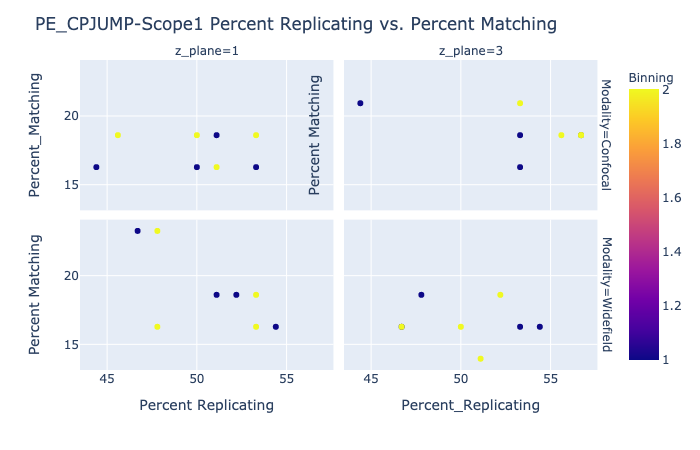

In [30]:
specific_vendor='PE'
fig = px.scatter(data_frame=PE_df, x='Percent_Replicating', y='Percent_Matching', facet_row='Modality',
                 facet_col='z_plane', color='Binning')
fig.update_layout(dict(title='PE_CPJUMP-Scope1 Percent Replicating vs. Percent Matching'),
                  xaxis=dict(title='Percent Replicating'),
                  yaxis=dict(title='Percent Matching'),
                  yaxis4=dict(title='Percent Matching'))
fig.show("png")
fig.write_image('figures/1.PE_percent_replicating_vs_percent_matching.png', width=680, height=510, scale=2)